<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />

# Worksheet 3 - Data Visualization
This worksheet will walk you through the basic process of preparing a visualization using Python/Pandas/Matplotlib/Seaborn/Cufflinks.  

For this exercise, we will be creating a line plot comparing the number of hosts infected by the Bedep and ConfickerAB Bot Families in the Government/Politics sector.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly
import panel as pn
cf.go_offline()
%matplotlib inline
plt.style.use('ggplot')

## Prepare the data
The data we will be using is in the `dailybots.csv` file which can be found in the `data` folder.  As is common, we will have to do some data wrangling to get it into a format which we can use to visualize this data.  To do that, we'll need to:
1.  Read in the data
2.  Filter the data by industry and botnet
The result should look something like this:

<table>
    <tr>
        <th></th>
        <th>date</th>
        <th>ConflikerAB</th>
        <th>Bedep</th>
    </tr>
    <tr>
        <td>0</td>
        <td>2016-06-01</td>
        <td>255</td>
        <td>430</td>
    </tr>
    <tr>
        <td>1</td>
        <td>2016-06-02</td>
        <td>431</td>
        <td>453</td>
    </tr>
</table>

The way I chose to do this might be a little more complex, but I wanted you to see all the steps involved.

###  Step 1 Read in the data
Using the `pd.read_csv()` function, you can read in the data.

In [2]:
DATA_HOME = '../data/'
data = pd.read_csv(DATA_HOME + 'dailybots.csv')
data.head()

,date,botfam,industry,hosts,orgs
0,2016-06-01,Bedep,Education,88,33
1,2016-06-01,Bedep,Finance,387,17
2,2016-06-01,Bedep,Government/Politics,430,42
3,2016-06-01,Bedep,Healthcare/Wellness,42,19
4,2016-06-01,Bedep,Manufacturing,184,18


### Step 2:  Filter the Data
The next step is to filter both by industry and by botfam.  In order to get the data into the format I wanted, I did this separately.  First, I created a second dataframe called `filteredData` which only contains the information from the `Government/Politics` industry.

In [3]:
# Your code here ...
filteredData = data[data['industry']=='Government/Politics']
filteredData

,date,botfam,industry,hosts,orgs
2,2016-06-01,Bedep,Government/Politics,430,42
8,2016-06-01,ConfickerAB,Government/Politics,255,38
14,2016-06-01,Necurs,Government/Politics,277,25
23,2016-06-01,PushDo,Government/Politics,8,2
28,2016-06-01,Ramnit,Government/Politics,53,6
...,...,...,...,...,...
4942,2016-08-29,Ramnit,Government/Politics,56,5
4948,2016-08-29,Sality,Government/Politics,120,12
4954,2016-08-29,zeroaccess,Government/Politics,13,6
4960,2016-08-29,Zeus,Government/Politics,19,13


Next, I created a second DataFrame which only contains the information from the `ConfickerAB` botnet.  I also reduced the columns to the date and host count.  You'll need to rename the host count so that you can merge the other data set later.

In [4]:
# Your code here...
conFickerdf = filteredData[filteredData['botfam']=='ConfickerAB']
conFickerdf

,date,botfam,industry,hosts,orgs
8,2016-06-01,ConfickerAB,Government/Politics,255,38
64,2016-06-02,ConfickerAB,Government/Politics,431,45
120,2016-06-03,ConfickerAB,Government/Politics,367,36
178,2016-06-04,ConfickerAB,Government/Politics,272,32
234,2016-06-05,ConfickerAB,Government/Politics,245,32
...,...,...,...,...,...
4709,2016-08-25,ConfickerAB,Government/Politics,372,39
4764,2016-08-26,ConfickerAB,Government/Politics,341,37
4817,2016-08-27,ConfickerAB,Government/Politics,274,34
4871,2016-08-28,ConfickerAB,Government/Politics,238,30


In [5]:
conFickerdf = conFickerdf.drop(columns=['botfam', 'industry', 'orgs'])
conFickerdf

,date,hosts
8,2016-06-01,255
64,2016-06-02,431
120,2016-06-03,367
178,2016-06-04,272
234,2016-06-05,245
...,...,...
4709,2016-08-25,372
4764,2016-08-26,341
4817,2016-08-27,274
4871,2016-08-28,238


In [6]:
conFickerdf = conFickerdf.rename(columns={'hosts':'ConfikerAB'})
conFickerdf

,date,ConfikerAB
8,2016-06-01,255
64,2016-06-02,431
120,2016-06-03,367
178,2016-06-04,272
234,2016-06-05,245
...,...,...
4709,2016-08-25,372
4764,2016-08-26,341
4817,2016-08-27,274
4871,2016-08-28,238


Repeat this porcess for the `Bedep` botfam in a separate dataFrame.  

In [7]:
bedepdf = filteredData[filteredData['botfam']=='Bedep']
bedepdf

,date,botfam,industry,hosts,orgs
2,2016-06-01,Bedep,Government/Politics,430,42
58,2016-06-02,Bedep,Government/Politics,453,42
114,2016-06-03,Bedep,Government/Politics,338,35
172,2016-06-04,Bedep,Government/Politics,259,18
228,2016-06-05,Bedep,Government/Politics,284,11
...,...,...,...,...,...
4703,2016-08-25,Bedep,Government/Politics,40,11
4758,2016-08-26,Bedep,Government/Politics,19,12
4811,2016-08-27,Bedep,Government/Politics,7,4
4865,2016-08-28,Bedep,Government/Politics,3,2


In [8]:
bedepdf = bedepdf.drop(columns=['botfam', 'industry', 'orgs'])
bedepdf

,date,hosts
2,2016-06-01,430
58,2016-06-02,453
114,2016-06-03,338
172,2016-06-04,259
228,2016-06-05,284
...,...,...
4703,2016-08-25,40
4758,2016-08-26,19
4811,2016-08-27,7
4865,2016-08-28,3


In [9]:
bedepdf = bedepdf.rename(columns={'hosts':'Bedep'})
bedepdf

,date,Bedep
2,2016-06-01,430
58,2016-06-02,453
114,2016-06-03,338
172,2016-06-04,259
228,2016-06-05,284
...,...,...
4703,2016-08-25,40
4758,2016-08-26,19
4811,2016-08-27,7
4865,2016-08-28,3


### Step 3: Merge the DataFrames.
Next, you'll need to merge the dataframes so that you end up with a dataframe with three columns: the date, the `ConfickerAB` count, and the the `Bedep` count.  Pandas has a `.merge()` function which is documented here: http://pandas.pydata.org/pandas-docs/stable/merging.html


In [10]:
# Your code here...
merged_df = pd.merge(conFickerdf, bedepdf, on='date')
merged_df

,date,ConfikerAB,Bedep
0,2016-06-01,255,430
1,2016-06-02,431,453
2,2016-06-03,367,338
3,2016-06-04,272,259
4,2016-06-05,245,284
...,...,...,...
84,2016-08-25,372,40
85,2016-08-26,341,19
86,2016-08-27,274,7
87,2016-08-28,238,3


##  Create the first chart
Using the `.plot()` method, plot your dataframe and see what you get.  

<Axes: >

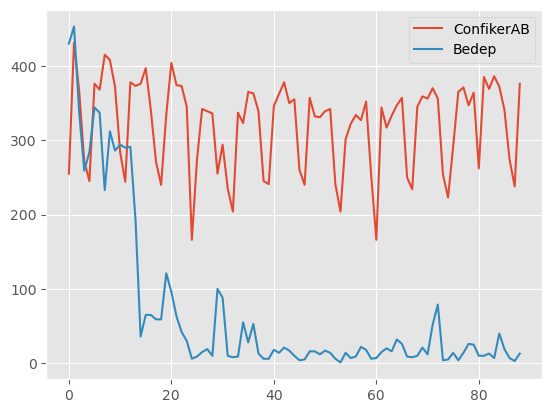

In [11]:
# Your code here...
merged_df.plot()

## Step 3 Customizing your plot:
The default plot doesn't look horrible, but there are certainly some improvements which can be made.  Try the following:
1.  Change the x-axis to a date by converting the date column to a date object.
2.  Move the Legend to the upper center of the graph
3.  Make the figure size larger.
4.  Instead of rendering both lines on one graph, split them up into two plots
5.  Add axis labels

There are many examples in the documentation which is available: https://pandas.pydata.org/docs/user_guide/visualization.html

In [12]:
datetime_df = merged_df.copy()
datetime_df['date'] = pd.to_datetime(datetime_df['date'])
datetime_df

,date,ConfikerAB,Bedep
0,2016-06-01,255,430
1,2016-06-02,431,453
2,2016-06-03,367,338
3,2016-06-04,272,259
4,2016-06-05,245,284
...,...,...,...
84,2016-08-25,372,40
85,2016-08-26,341,19
86,2016-08-27,274,7
87,2016-08-28,238,3


In [13]:
datetime_df = datetime_df.set_index('date')
datetime_df

,ConfikerAB,Bedep
date,,
2016-06-01,255,430
2016-06-02,431,453
2016-06-03,367,338
2016-06-04,272,259
2016-06-05,245,284
...,...,...
2016-08-25,372,40
2016-08-26,341,19
2016-08-27,274,7


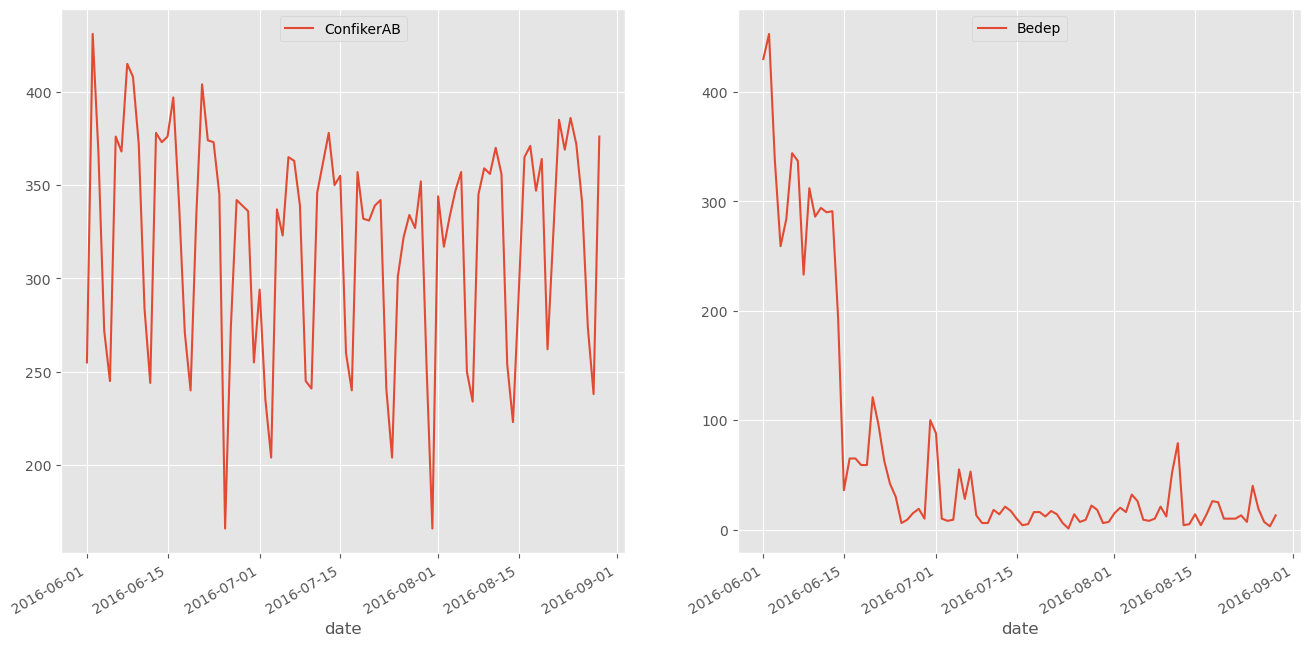

In [16]:
# Your code here...
fig, (ax0, ax1) = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
datetime_df['ConfikerAB'].plot(ax=ax0)
datetime_df['Bedep'].plot(ax=ax1)
ax0.legend(loc='upper center')
ax1.legend(loc='upper center')

### Move the Legend to the Upper Center of the Graph
For this, you'll have to assign the plot variable to a new variable and then call the formatting methods on it. 

In [ ]:
 # Your code here ...

### Make the Figure Size Larger:


In [ ]:
# Your code here...

### Adding Subplots
The first thing you'll need to do is call the `.subplots( nrows=<rows>, ncols=<cols> )` to create a subplot.
Next, plot your charts using the `.plot()` method.  To do add the second plot to your figure, add the `ax=axes[n]` to the `.plot()` method.

In [ ]:
# Your code here...

# Making it Interactive

Using `cufflinks`, plot an interactive time series chart of this data. Plot each series on a separate line.  The documentation for `cufflinks` can be found here: https://github.com/santosjorge/cufflinks.   

In [17]:
# Your code here...
datetime_df.iplot(asFigure=True)